<h1>DENGUE DATA ANALYSIS IN 18 REGIONS OF THE PHILIPPINES</h1>
<HR>
<h2>ANALYST: JOHN ALLEN BONGGAY</h2>

<h2>CHAPTER 1: IMPORTING AND GRAPH VISUALIZING</h2>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [42]:
dengue = pd.read_csv('dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [43]:
dengue['Year'] = dengue['Year'].astype('int')
region_order = ['BARMM', 'CAR', 'NCR', 'Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region IX', 'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region X', 'Region XI', 'Region XII', 'Region XIII']
dengue['Region'] = pd.Categorical(dengue['Region'], categories=region_order, ordered=True)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h2>CHAPTER 2: FILLING NULL VALUES</h2>

In [44]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h2>CHAPTER 3: ASSESSING DATA TYPES</h2>

In [45]:
dengue["Month"] = dengue["Month"].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [46]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


<h2>CHAPTER 4: DATA ANALYSIS</h2>

<h3>1. HOW MANY DENGUE CASES ARE RECORDED IN THE SPAN OF 5 YEARS(2016-2020)?</h3>

In [47]:
dengue.value_counts().sum()

np.int64(1020)

<h3>Insight 1</h3>
<p>There are 1020 total cases recorded in the span of 2016 to 2020. It's still a lot considering the fact that Dengue can only be catch via a vector which is mosquitoes. During 2016-2020, Dengue cases ups Tuberculosis(TB).</p>

<h3>2. DENGUE CASES THROUGHOUT THE YEAR</h3>

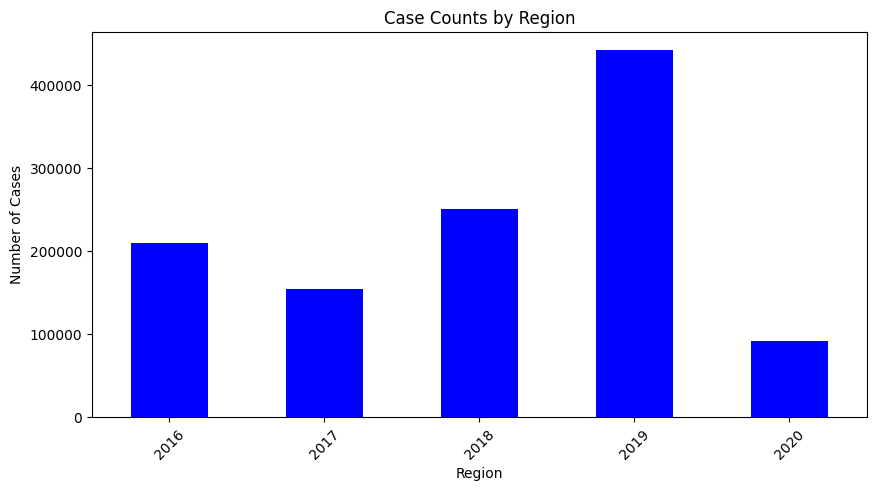

In [48]:
case_by_region = dengue.groupby("Year")["Dengue_Cases"].sum()

plt.figure(figsize=(10,5))
case_by_region.plot(kind="bar", color="blue")
plt.title("Case Counts by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()

<h3>INSIGHT 2</h3>
<p>Why is there a spike in numbers in the graph but few in the dataset?
Anyways, 2019 Dengue Cases shows an abruptly high amount of cases, doubling or tripling the heights of other years. Back on August 2019 the Public Health Emergency(PHE) declared a national dengue epidemic, which likely led to increased Dengue Testing. Additionally, there seems a natural cycle of Dengue outbreaks and the year 2019 might be the peak of it.</p>

<h3>INSIGHT 3</h3>
<p>2019 appears to be the highest but when it comes to lowest it's 2020. Due to the Covid-19 Pandemic, people are locked in their homes, less check-ups for they fear that even it's Dengue Fever it will be diagnosed as Covid-19 Positive. Plus, DOH and other Healthcare Governance focuses primarily on minimizing and monitoring the spread of the pandemic.</p>

<h3>INSIGHT 4</h3>
<p>In 2016, Dengvaxia was initiated to curb Dengue cases. Also weather condition dated back in 2016, having El Ninyo contributes on less mosquito though the rainy season on Ber months negates the effect. 2017, has fewer cases than 2016 and 2018, the natural cycle must be at its lowest. 2018, cases higher than 2016 and 2017, in this year, the controversy of Dengvaxia causes panic to people therefore there are less vaccinations because the vaccine just makes you much prone to dengue -- that's the controversy.</p>

<h3>3. 2019 DENGUE CASES CONTRIBUTORS</h3>

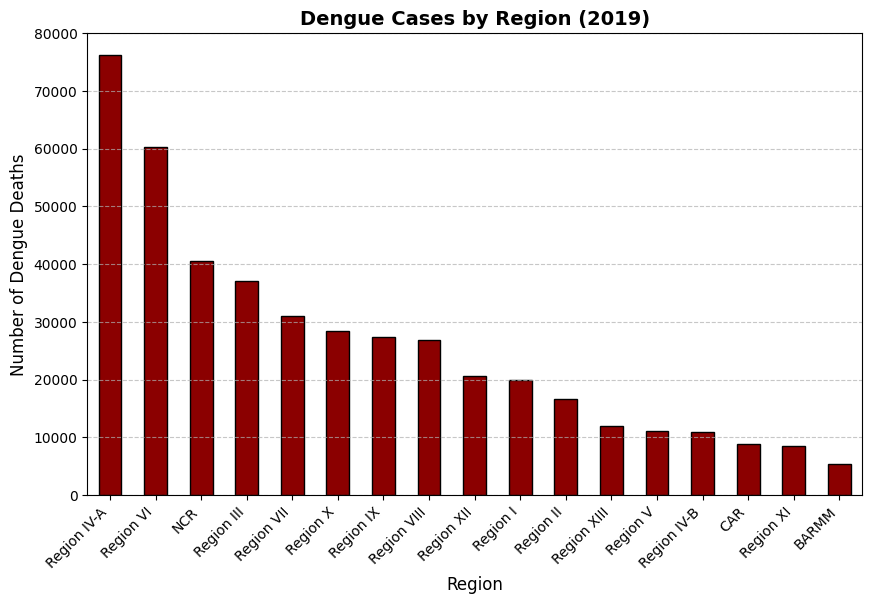

In [49]:
dengue_2019 = dengue[dengue['Year'] == 2019]
region_2019 = dengue_2019.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)

# Display the region with the highest mortality
max_region = region_2019.idxmax()
max_deaths = region_2019.max()

plt.figure(figsize=(10, 6))
region_2019.plot(kind='bar', color='darkred', edgecolor='black')

plt.title('Dengue Cases by Region (2019)', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Dengue Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>INSIGHT 5</h3>
<p>Bangsamoro Autonomous Region in Muslim Mindanao(BARMM) has the lowest cases back in 2019. Sadly, this region is one of the poorest and low populized regions in the Philippines meaning lower access to Healthcare -- infrequenct check-ups, BARMM Dengue cases could maybe be higher. Plus, decades of armed conflicts here, medical team would be busy checking up theirselves on bullet wounds.</p>

<h3>INSIGHT 6</h3>
<p>On the other hand, CALABARZON(IV-A) has the highest cases recorded, towering up to 80,000 cases in just a year. This region near Metro Manila(NCR) experienced a rapid urbanization and population growth unlike BARMM, leading to high amount of cases. Adding up is its ideal climate conditions, mosquitos loves to hang out on high populated and congested environments, stagnant water from rains or man-made is a go-to place.</p>

<h3>4. 2019 MONTHLY CASES DISTRIBUTION</h3>

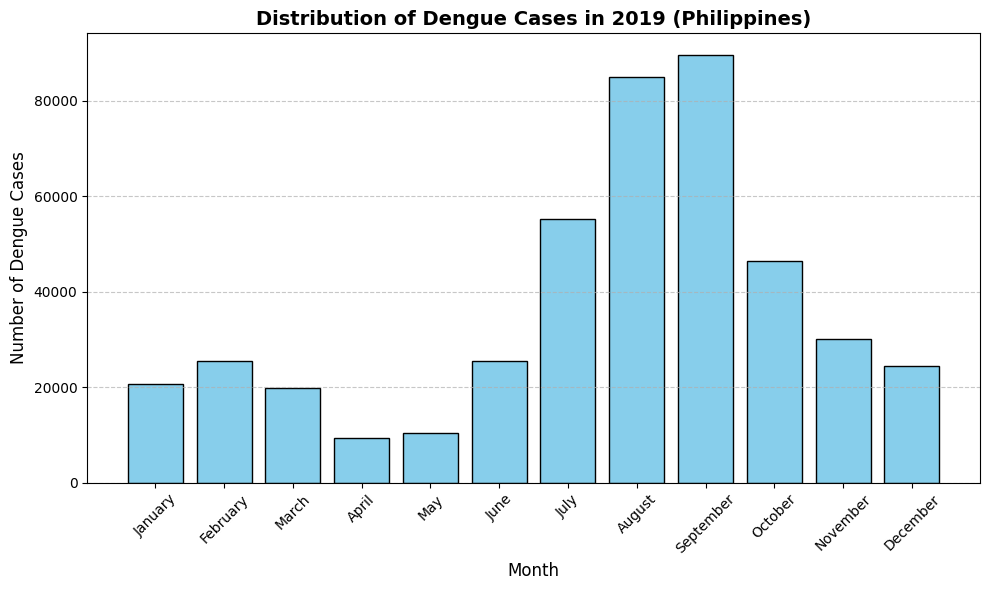

In [50]:
dengue_2019 = dengue[dengue['Year'] == 2019]

monthly_cases_2019 = dengue_2019.groupby('Month')['Dengue_Cases'].sum()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_cases_2019 = monthly_cases_2019.reindex(month_order)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(monthly_cases_2019.index, monthly_cases_2019.values, color='skyblue', edgecolor='black')


plt.title('Distribution of Dengue Cases in 2019 (Philippines)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Dengue Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Insight 7</h3>
<p>Dengue incidence in 2019 shows a pronounced surge beginning in June and reaching its peak around August, coinciding with the wettest months in the Philippines. This pattern highlights the strong link between rainfall volume and mosquito population growth, reinforcing the need for intensified vector control and public awareness campaigns before the onset of the rainy season.</p>

<h3>Insight 8</h3>
<p>The months following September show a decline in cases, suggesting that dengue transmission is highly seasonal and sensitive to environmental changes such as temperature and precipitation.</p>


<h3>5. MORTALITY RATES IN 2019</h3>

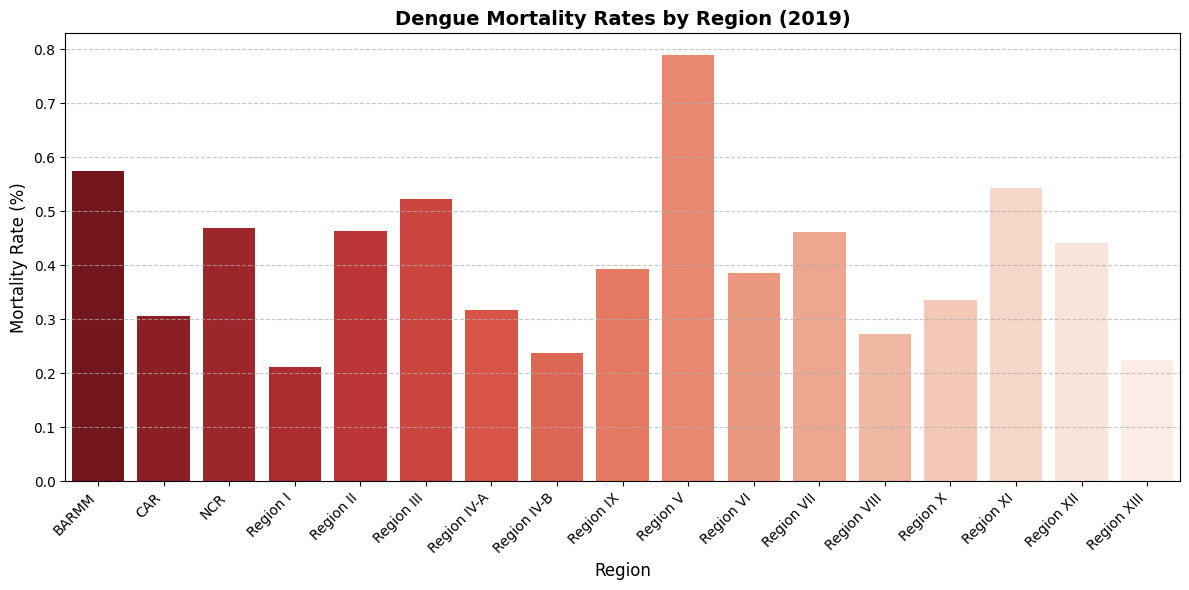

In [51]:
dengue_2019 = dengue[dengue['Year'] == 2019]

regional_mortality = (
    dengue_2019.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']]
    .sum()
    .assign(Mortality_Rate=lambda x: (x['Dengue_Deaths'] / x['Dengue_Cases']) * 100)
    .reset_index()
)

regional_mortality = regional_mortality.sort_values('Mortality_Rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=regional_mortality,
    x='Region', y='Mortality_Rate',
    palette='Reds_r'
)

plt.title('Dengue Mortality Rates by Region (2019)', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Mortality Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h3>Insight 9</h3>
<p>Region V (Bicol Region) showed the highest mortality rates despite not having the largest number of dengue cases. This pattern suggests that while the region may have experienced moderate infection levels, many cases likely went untreated or were reported late. Geographic challenges such as scattered rural communities, frequent typhoons, and limited access to tertiary hospitals may have delayed emergency care and proper case management, ultimately increasing the fatality ratio among confirmed dengue infections.</p>

<h3>Insight 10</h3>
<p>BARMM recorded the highest dengue mortality rate among all Philippine regions in 2019. As been said, BARMM is strongly linked to its status as one of the country’s poorest and least developed regions, where limited healthcare infrastructure, delayed access to medical facilities, and shortages of diagnostic resources contribute to higher fatality rates. Additionally, low awareness of early dengue symptoms may have led to late hospital consultations, resulting in more severe complications and deaths.</p>

<h3>Insight 11</h3>
<p>As been said(part 2), regions with moderate to high dengue case counts but lower mortality rates—such as NCR and Region IV-A showcases stronger health systems and better disease surveillance. The availability of hospitals, early detection programs, and access to public health campaigns likely helped manage infections more effectively, reducing the proportion of fatal outcomes even on dense populations.</p>

<h3>6. Regions with High Mortality but Low Case Counts </h3>

In [52]:
regional_stats = (
    dengue.groupby(['Year', 'Region'])
    .agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'})
    .assign(Mortality_Rate=lambda x: (x['Dengue_Deaths'] / x['Dengue_Cases']) * 100)
    .reset_index()
)

median_cases = regional_stats['Dengue_Cases'].median()
mean_mortality = regional_stats['Mortality_Rate'].mean()

high_mortality_low_cases = regional_stats[
    (regional_stats['Dengue_Cases'] < median_cases) &
    (regional_stats['Mortality_Rate'] > mean_mortality)
]

print(high_mortality_low_cases)

    Year       Region  Dengue_Cases  Dengue_Deaths  Mortality_Rate
0   2016        BARMM          2191            243       11.090826
16  2016  Region XIII          7215            824       11.420651
25  2017    Region IX          4274            313        7.323350
29  2017  Region VIII          3916            398       10.163432
30  2017     Region X          6679            548        8.204821
31  2017    Region XI          3667            209        5.699482
68  2020        BARMM          1008             23        2.281746
69  2020          CAR           981             73        7.441386
70  2020          NCR          7183            483        6.724210
83  2020   Region XII          4363            248        5.684162


<h3>Insight 12</h3>
<p>Regions with the highest dengue case densities, such as NCR and Region IV-A, did not record the highest mortality rates. This disconnect suggests that case volume alone is not the main driver of fatality. Instead, healthcare capacity, early detection, and accessibility to hospitals play a more decisive role in determining outcomes. Urbanized regions, despite having overcrowded environments, benefit from rapid medical response systems that prevent severe dengue cases from turning fatal.</p>

<h3>Insight 13</h3>
<p>Conversely, some regions with relatively fewer dengue cases showed disproportionately high mortality rates. This indicates that where outbreaks occur in less-prepared or under-resourced areas, the fatality ratio can escalate quickly even without widespread transmission. The finding underscores the importance of equitable healthcare readiness across all regions, not just in those with historically high dengue activity.</p>


<h3>7. Regions with Irregular Year-to-Year Changes (Possible Underreporting)</h3>

In [53]:
regional_stats['Case_Change_%'] = regional_stats.groupby('Region')['Dengue_Cases'].pct_change() * 100
regional_stats['Death_Change_%'] = regional_stats.groupby('Region')['Dengue_Deaths'].pct_change() * 100

inconsistent_regions = regional_stats[
    (regional_stats['Case_Change_%'].abs() > 200) |
    (regional_stats['Death_Change_%'].abs() > 200)
]

print(inconsistent_regions)

    Year       Region  Dengue_Cases  Dengue_Deaths  Mortality_Rate  \
21  2017    Region II          5310             34        0.640301   
25  2017    Region IX          4274            313        7.323350   
27  2017    Region VI          9283           1380       14.865884   
28  2017   Region VII         15940           1189        7.459222   
29  2017  Region VIII          3916            398       10.163432   
30  2017     Region X          6679            548        8.204821   
34  2018        BARMM          2460             33        1.341463   
38  2018    Region II         17678             62        0.350718   
41  2018  Region IV-B          8019             51        0.635990   
47  2018     Region X         23497            101        0.429842   
50  2018  Region XIII          9053             42        0.463935   
52  2019          CAR          8808             27        0.306540   
59  2019    Region IX         27447            108        0.393486   
60  2019     Region 

<h3>Insight 14</h3>
<p>Several regions displayed irregular year-to-year dengue death counts that did not correspond to their case numbers, suggesting possible underreporting or inconsistencies in data collection. These discrepancies may arise from incomplete hospital reporting, delayed surveillance updates, or insufficient diagnostic confirmation in rural areas. Strengthening the national dengue reporting framework and enforcing standardized case documentation could improve data reliability and help target public health interventions more precisely.</p>

<h3>8. IS THERE A CORRELATION BETWEEN THE MONTH OF OCTOBER AND DENGUE CASE SPIKES UP?</h3>

In [54]:
dengue['Month'] = dengue['Month'].str.lower()

dengue['Is_October'] = dengue['Month'].apply(lambda x: 1 if x == 'october' else 0)
corr_value = dengue['Is_October'].corr(dengue['Dengue_Cases'])

print(f"Correlation between October and dengue cases: {corr_value:.3f}")

Correlation between October and dengue cases: 0.047


<h3>Insight 15</h3>
<p>Apparently, there's no correlation of Dengue Case Spikes Up in the month of October, in the earlier graph, August and September has the highest reported cases and it slowly fluctuates beginning in October.</p>

<h3>ADDITIONAL ANALYSIS</h3>

<h3>WHAT MONTH YOU NEED TO BE CAUTIOS WHEN IT COMES TO DENGUE?</h3>

In [59]:
dengue.columns = dengue.columns.str.strip().str.title()

# Compute Case Fatality Rate (CFR) per month
df_monthly = dengue.groupby("Month", as_index=False)[["Dengue_Cases", "Dengue_Deaths"]].sum()
df_monthly["Fatality_Rate"] = (df_monthly["Dengue_Deaths"] / df_monthly["Dengue_Cases"]) * 100

df_monthly = df_monthly.sort_values("Fatality_Rate", ascending=False)

print("🩸 Dengue Fatality Rate by Month (in %):\n")
print(df_monthly[["Month", "Fatality_Rate"]])

most_fatal = df_monthly.iloc[0]
print(f"\n⚠️ Dengue was most fatal in {most_fatal['Month']} "
      f"with a fatality rate of {most_fatal['Fatality_Rate']:.2f}%")


🩸 Dengue Fatality Rate by Month (in %):

        Month  Fatality_Rate
10    october       5.669599
11  september       3.455039
9    november       0.645943
0       april       0.615233
6        june       0.554121
7       march       0.505419
8         may       0.500201
4     january       0.467223
2    december       0.456853
5        july       0.441979
3    february       0.404879
1      august       0.380690

⚠️ Dengue was most fatal in october with a fatality rate of 5.67%


<hr>

<h1>THE END</h1>